# PySpark Data Engineering Project

### Using PySpark

## Importing the Data

### Creating the Pyspark SQL Dataframe

In [1]:
# !pip install pyspark
# !pip install pandas

In [2]:
import pandas as pd
from pyspark.sql import SparkSession

In [3]:
# pd.read_csv('eurusd_hour.csv').head()
# type(pd.read_csv('DataSet/eurusd_hour.csv'))

# Sample DataFrame
# data = [(1, "Alice", 25), (2, "Bob", 30), (3, "Charlie", 35)]
# columns = ["ID", "Name", "Age"]

# # Create a Spark session
# spark = SparkSession.builder.appName("example").getOrCreate()

# # Create a DataFrame
# df = spark.createDataFrame(data, columns)

In [4]:
spark = SparkSession.builder.appName("Project").getOrCreate()
# spark = SparkSession.builder.appName("Project").config("spark.rpc.message.maxSize", 2147483647).getOrCreate()

In [5]:
spark

In [6]:
df_raw = spark.read.option('header','true').csv('DataSet/eurusd_hour.csv')
df_raw.show(3)



+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|      Date| Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|
+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|2005-05-02|00:00|1.2852|1.2852| 1.284|1.2844|-0.00079999999999...|1.2854|1.2854|1.2842|1.2846|-0.00080000000000...|
|2005-05-02|01:00|1.2844|1.2848|1.2839|1.2842|-0.00019999999999...|1.2846| 1.285|1.2841|1.2844|-0.00019999999999...|
|2005-05-02|02:00|1.2843|1.2854|1.2841|1.2851|0.000799999999999...|1.2845|1.2856|1.2843|1.2853|0.000800000000000...|
+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
only showing top 3 rows



In [7]:
pandas_df = df_raw.toPandas()

# Display the Pandas DataFrame so that it appears in a better format on github
pandas_df.head(3)

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.2852,1.2852,1.284,1.2844,-0.0007999999999999119,1.2854,1.2854,1.2842,1.2846,-0.0008000000000001339
1,2005-05-02,01:00,1.2844,1.2848,1.2839,1.2842,-0.000199999999999978,1.2846,1.285,1.2841,1.2844,-0.000199999999999978
2,2005-05-02,02:00,1.2843,1.2854,1.2841,1.2851,0.0007999999999999119,1.2845,1.2856,1.2843,1.2853,0.0008000000000001339


In [8]:
df_pyspark = spark.read.option('header','true').csv('DataSet/eurusd_hour.csv', inferSchema = True)
df_pyspark

DataFrame[Date: date, Time: timestamp, BO: double, BH: double, BL: double, BC: double, BCh: double, AO: double, AH: double, AL: double, AC: double, ACh: double]

In [9]:
df_pyspark.show(5)

+----------+-------------------+------+------+------+------+--------------------+------+------+------+------+--------------------+
|      Date|               Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|
+----------+-------------------+------+------+------+------+--------------------+------+------+------+------+--------------------+
|2005-05-02|2023-10-04 00:00:00|1.2852|1.2852| 1.284|1.2844|-7.99999999999911...|1.2854|1.2854|1.2842|1.2846|-8.00000000000133...|
|2005-05-02|2023-10-04 01:00:00|1.2844|1.2848|1.2839|1.2842|-1.99999999999978E-4|1.2846| 1.285|1.2841|1.2844|-1.99999999999978E-4|
|2005-05-02|2023-10-04 02:00:00|1.2843|1.2854|1.2841|1.2851|7.999999999999119E-4|1.2845|1.2856|1.2843|1.2853|8.000000000001339E-4|
|2005-05-02|2023-10-04 03:00:00|1.2851|1.2859| 1.285|1.2851|                 0.0|1.2853|1.2861|1.2852|1.2853|                 0.0|
|2005-05-02|2023-10-04 04:00:00|1.2852|1.2859|1.2849|1.2855| 3.00000000000189E-4|1.

In [10]:
type(df_pyspark)
# this is a pyspark sql dataframe not a pandas dataframe

pyspark.sql.dataframe.DataFrame

In [11]:
# Checking the Schema
df_pyspark.printSchema()
# same as df.info() - gives information about our columns

root
 |-- Date: date (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- BO: double (nullable = true)
 |-- BH: double (nullable = true)
 |-- BL: double (nullable = true)
 |-- BC: double (nullable = true)
 |-- BCh: double (nullable = true)
 |-- AO: double (nullable = true)
 |-- AH: double (nullable = true)
 |-- AL: double (nullable = true)
 |-- AC: double (nullable = true)
 |-- ACh: double (nullable = true)



In [12]:
# double checking the column types / schema of df
df_pyspark.dtypes

[('Date', 'date'),
 ('Time', 'timestamp'),
 ('BO', 'double'),
 ('BH', 'double'),
 ('BL', 'double'),
 ('BC', 'double'),
 ('BCh', 'double'),
 ('AO', 'double'),
 ('AH', 'double'),
 ('AL', 'double'),
 ('AC', 'double'),
 ('ACh', 'double')]

In [13]:
df_pyspark.show(3)

+----------+-------------------+------+------+------+------+--------------------+------+------+------+------+--------------------+
|      Date|               Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|
+----------+-------------------+------+------+------+------+--------------------+------+------+------+------+--------------------+
|2005-05-02|2023-10-04 00:00:00|1.2852|1.2852| 1.284|1.2844|-7.99999999999911...|1.2854|1.2854|1.2842|1.2846|-8.00000000000133...|
|2005-05-02|2023-10-04 01:00:00|1.2844|1.2848|1.2839|1.2842|-1.99999999999978E-4|1.2846| 1.285|1.2841|1.2844|-1.99999999999978E-4|
|2005-05-02|2023-10-04 02:00:00|1.2843|1.2854|1.2841|1.2851|7.999999999999119E-4|1.2845|1.2856|1.2843|1.2853|8.000000000001339E-4|
+----------+-------------------+------+------+------+------+--------------------+------+------+------+------+--------------------+
only showing top 3 rows



As we can see here an error was introduced in the Time COLUMN. 

A timestamp with the current date was introduced additionally to the time in the Time column 

Let's fix this:

In [14]:
from pyspark.sql.functions import date_format

# keeping only the hours and minutes of the time column
df = df_pyspark.withColumn("Time", date_format("Time", "HH:mm"))
df.show(5)

+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|      Date| Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|
+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|2005-05-02|00:00|1.2852|1.2852| 1.284|1.2844|-7.99999999999911...|1.2854|1.2854|1.2842|1.2846|-8.00000000000133...|
|2005-05-02|01:00|1.2844|1.2848|1.2839|1.2842|-1.99999999999978E-4|1.2846| 1.285|1.2841|1.2844|-1.99999999999978E-4|
|2005-05-02|02:00|1.2843|1.2854|1.2841|1.2851|7.999999999999119E-4|1.2845|1.2856|1.2843|1.2853|8.000000000001339E-4|
|2005-05-02|03:00|1.2851|1.2859| 1.285|1.2851|                 0.0|1.2853|1.2861|1.2852|1.2853|                 0.0|
|2005-05-02|04:00|1.2852|1.2859|1.2849|1.2855| 3.00000000000189E-4|1.2854|1.2861|1.2851|1.2857|2.999999999999669...|
+----------+-----+------+------+------+------+------------------

In [15]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Time: string (nullable = true)
 |-- BO: double (nullable = true)
 |-- BH: double (nullable = true)
 |-- BL: double (nullable = true)
 |-- BC: double (nullable = true)
 |-- BCh: double (nullable = true)
 |-- AO: double (nullable = true)
 |-- AH: double (nullable = true)
 |-- AL: double (nullable = true)
 |-- AC: double (nullable = true)
 |-- ACh: double (nullable = true)



The type of the time column has become string now

In [16]:
from pyspark.sql.functions import concat, col

# Creating a new column called Datetime which will be a concatination of the data and time columns
df = df.withColumn("DateTime", concat(col("Date"), col("Time")))
df.show(3)

+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+---------------+
|      Date| Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|       DateTime|
+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+---------------+
|2005-05-02|00:00|1.2852|1.2852| 1.284|1.2844|-7.99999999999911...|1.2854|1.2854|1.2842|1.2846|-8.00000000000133...|2005-05-0200:00|
|2005-05-02|01:00|1.2844|1.2848|1.2839|1.2842|-1.99999999999978E-4|1.2846| 1.285|1.2841|1.2844|-1.99999999999978E-4|2005-05-0201:00|
|2005-05-02|02:00|1.2843|1.2854|1.2841|1.2851|7.999999999999119E-4|1.2845|1.2856|1.2843|1.2853|8.000000000001339E-4|2005-05-0202:00|
+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+---------------+
only showing top 3 rows



In [17]:
pandas_df = df.toPandas()

# Display the Pandas DataFrame so that it appears in a better format on github
pandas_df.head(3)

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh,DateTime
0,2005-05-02,00:00,1.2852,1.2852,1.2840,1.2844,-0.0008,1.2854,1.2854,1.2842,1.2846,-0.0008,2005-05-0200:00
1,2005-05-02,01:00,1.2844,1.2848,1.2839,1.2842,-0.0002,1.2846,1.2850,1.2841,1.2844,-0.0002,2005-05-0201:00
2,2005-05-02,02:00,1.2843,1.2854,1.2841,1.2851,0.0008,1.2845,1.2856,1.2843,1.2853,0.0008,2005-05-0202:00


lets fix the format and also the type of the datetime column

By fixing the format I mean: add a space between the date and the time

In [18]:
from pyspark.sql.functions import to_timestamp

df = df.withColumn("DateTime", to_timestamp(col("DateTime"), "yyyy-MM-ddHH:mm"))
df.show(3)

+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+-------------------+
|      Date| Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|           DateTime|
+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+-------------------+
|2005-05-02|00:00|1.2852|1.2852| 1.284|1.2844|-7.99999999999911...|1.2854|1.2854|1.2842|1.2846|-8.00000000000133...|2005-05-02 00:00:00|
|2005-05-02|01:00|1.2844|1.2848|1.2839|1.2842|-1.99999999999978E-4|1.2846| 1.285|1.2841|1.2844|-1.99999999999978E-4|2005-05-02 01:00:00|
|2005-05-02|02:00|1.2843|1.2854|1.2841|1.2851|7.999999999999119E-4|1.2845|1.2856|1.2843|1.2853|8.000000000001339E-4|2005-05-02 02:00:00|
+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+-------------------+
only showing top 3 rows



In [19]:
# changing the order of the columns in the PySpark DataFrame
df = df.select("DateTime", "Date", "Time", "BO", "BH", "BL", "BC", "BCh", "AO", "AH", "AL", "AC", "ACh")
df.show(3)

+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|           DateTime|      Date| Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|
+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|2005-05-02 00:00:00|2005-05-02|00:00|1.2852|1.2852| 1.284|1.2844|-7.99999999999911...|1.2854|1.2854|1.2842|1.2846|-8.00000000000133...|
|2005-05-02 01:00:00|2005-05-02|01:00|1.2844|1.2848|1.2839|1.2842|-1.99999999999978E-4|1.2846| 1.285|1.2841|1.2844|-1.99999999999978E-4|
|2005-05-02 02:00:00|2005-05-02|02:00|1.2843|1.2854|1.2841|1.2851|7.999999999999119E-4|1.2845|1.2856|1.2843|1.2853|8.000000000001339E-4|
+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
only showing top 3 rows



In [20]:
# checking the column types / schema of df
df.printSchema()

root
 |-- DateTime: timestamp (nullable = true)
 |-- Date: date (nullable = true)
 |-- Time: string (nullable = true)
 |-- BO: double (nullable = true)
 |-- BH: double (nullable = true)
 |-- BL: double (nullable = true)
 |-- BC: double (nullable = true)
 |-- BCh: double (nullable = true)
 |-- AO: double (nullable = true)
 |-- AH: double (nullable = true)
 |-- AL: double (nullable = true)
 |-- AC: double (nullable = true)
 |-- ACh: double (nullable = true)



In [21]:
type(df)

pyspark.sql.dataframe.DataFrame

## Column and Data Analysis 

### Data Description

- **Date**: This column contains the date on which the financial data was recorded. Each row in the DataFrame corresponds to a specific date.

- **Time**: This column provides the timestamp for each data point, indicating the exact time when the data was captured. This level of granularity allows for tracking changes throughout the trading day.

- **Bid Open (BO)**: The "Bid Open" column represents the initial bid price at the start of a specific time interval. It's essentially the first price at which traders are willing to buy the EUR/USD currency pair during that interval.

- **Bid High (BH)**: This column shows the highest bid price reached during the same time interval. It tells us the peak price that buyers were willing to pay within that period.

- **Bid Low (BL)**: Here, we have the lowest bid price observed during the time interval, indicating the lowest price at which traders were willing to buy the currency pair.

- **Bid Close (BC)**: The closing bid price signifies the last recorded bid price at the end of the time interval, which can provide insights into how trading sentiment may have evolved during that period.

- **Bid Change (BCh)**: This column seems to represent the change in bid price during the interval, possibly calculated as the difference between the opening and closing bid prices. It helps track price movements.

- **Ask Open (AO)**: Similar to the bid open, this is the initial asking price for the EUR/USD currency pair at the beginning of the time interval. It represents the first price at which sellers are willing to sell.

- **Ask High (AH)**: The highest asking price during the time interval is found here. It indicates the peak price sellers were requesting for the currency pair.

- **Ask Low (AL)**: The lowest asking price observed during the interval is listed in this column, representing the lowest price sellers were willing to accept.

- **Ask Close (AC)**: The closing asking price signifies the last recorded asking price at the end of the time interval. Like the closing bid price, it offers insights into potential shifts in market sentiment.

- **Ask Change (ACh)**: Similar to the bid change, this column appears to represent the change in asking price during the interval, possibly calculated as the difference between the opening and closing asking prices. It helps monitor price fluctuations from the perspective of sellers.

This dataset provides a comprehensive view of trading activity for the EUR/USD currency pair, including open, high, low, and close prices for both bid and ask prices. It's invaluable for financial analysis and can be used to analyze market trends, make trading decisions, and gain insights into the behavior of currency pairs in the foreign exchange market.


### Let's check the dimensions of our Pyspark SQL Dataframe

In [22]:
df.show(3)

+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|           DateTime|      Date| Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|
+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|2005-05-02 00:00:00|2005-05-02|00:00|1.2852|1.2852| 1.284|1.2844|-7.99999999999911...|1.2854|1.2854|1.2842|1.2846|-8.00000000000133...|
|2005-05-02 01:00:00|2005-05-02|01:00|1.2844|1.2848|1.2839|1.2842|-1.99999999999978E-4|1.2846| 1.285|1.2841|1.2844|-1.99999999999978E-4|
|2005-05-02 02:00:00|2005-05-02|02:00|1.2843|1.2854|1.2841|1.2851|7.999999999999119E-4|1.2845|1.2856|1.2843|1.2853|8.000000000001339E-4|
+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
only showing top 3 rows



In [23]:
# and 13 columns ( 1 that I introduced - DateTime )
# we have 93084 rows in our dataframe
print(f"Number of Rows: {df.count()}")
print(f"Number of Columns: {len(df.columns)}")

Number of Rows: 93084
Number of Columns: 13


In [24]:
df_pyspark.count()
# we have the same number of rows

93084

### Data Exploration

Apparently we have 6 days of week worth of data in our dataset

In [25]:
from pyspark.sql.functions import col, sum

sorted_dates = df_pyspark.select('Date').distinct().orderBy(col('Date'))

sorted_dates.show()

+----------+
|      Date|
+----------+
|2005-05-02|
|2005-05-03|
|2005-05-04|
|2005-05-05|
|2005-05-06|
|2005-05-08|
|2005-05-09|
|2005-05-10|
|2005-05-11|
|2005-05-12|
|2005-05-13|
|2005-05-15|
|2005-05-16|
|2005-05-17|
|2005-05-18|
|2005-05-19|
|2005-05-20|
|2005-05-22|
|2005-05-23|
|2005-05-24|
+----------+
only showing top 20 rows



Let's find out why we have data for 6 days a week instead of 5

Forex (foreign exchange) markets are generally open and available for trading 24 hours a day, five days a week. The forex market operates globally and is divided into different trading sessions, which include:

Sydney Session: This session starts at 10:00 PM GMT and ends at 7:00 AM GMT. It is the first major session to open.

Tokyo Session: Following the Sydney session, the Tokyo session begins at 11:00 PM GMT and ends at 8:00 AM GMT.

London Session: The London session is one of the most significant and active trading sessions. It starts at 8:00 AM GMT and ends at 4:00 PM GMT.

New York Session: The New York session overlaps with the London session and is open from 1:00 PM GMT to 10:00 PM GMT. This overlap period is typically the busiest time for forex trading.

During these trading sessions, currency pairs like EUR/USD (Euro/US Dollar) are actively traded. However, it's important to note that the forex market is closed on weekends (from Friday evening until Sunday evening GMT) and during certain holidays when major financial centers are closed.

So apparently forex trading is generally available every day from Sunday evening GMT to Friday evening GMT,

In [26]:
df.show(3)

+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|           DateTime|      Date| Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|
+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
|2005-05-02 00:00:00|2005-05-02|00:00|1.2852|1.2852| 1.284|1.2844|-7.99999999999911...|1.2854|1.2854|1.2842|1.2846|-8.00000000000133...|
|2005-05-02 01:00:00|2005-05-02|01:00|1.2844|1.2848|1.2839|1.2842|-1.99999999999978E-4|1.2846| 1.285|1.2841|1.2844|-1.99999999999978E-4|
|2005-05-02 02:00:00|2005-05-02|02:00|1.2843|1.2854|1.2841|1.2851|7.999999999999119E-4|1.2845|1.2856|1.2843|1.2853|8.000000000001339E-4|
+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+
only showing top 3 rows



In [27]:
from pyspark.sql.functions import min, max
from pyspark.sql.functions import date_format

selected_date = "2019-09-15"

# Filter the DataFrame to select data for the specified date (we picked a random Sunday)
filtered_df = df.filter(df['Date'] == selected_date)

# Show the filtered data
filtered_df.show()

hour_range = filtered_df.select(min('Time'), max('Time')).first()

# Extract the minimum and maximum values
min_hour = hour_range[0]
max_hour = hour_range[1]

day_of_week = filtered_df.select(date_format('Date', 'EEEE').alias('DayOfWeek')).first()

# Extract the day of the week
day_of_week = day_of_week['DayOfWeek']

# Display the day of the week
print(f"The selected date ({selected_date}) was a {day_of_week}.")

# Display the hour range
print(f"Hour range for {selected_date}:         {min_hour}      to      {max_hour}")

+-------------------+----------+-----+-------+-------+-------+-------+--------------------+------------------+-------+-------+-------+--------------------+
|           DateTime|      Date| Time|     BO|     BH|     BL|     BC|                 BCh|                AO|     AH|     AL|     AC|                 ACh|
+-------------------+----------+-----+-------+-------+-------+-------+--------------------+------------------+-------+-------+-------+--------------------+
|2019-09-15 21:00:00|2019-09-15|21:00|1.10727|1.10743|1.10678|1.10712|-1.49999999999872...|           1.10768| 1.1079| 1.1072|1.10749|-1.90000000000134...|
|2019-09-15 22:00:00|2019-09-15|22:00|1.10712|1.10794|1.10665|1.10785|7.299999999998974E-4|           1.10755|1.10811|1.10734|1.10801|4.599999999999049E-4|
|2019-09-15 23:00:00|2019-09-15|23:00|1.10786|1.10858|1.10783|1.10825|3.899999999998904E-4|1.1080299999999998|1.10871|1.10798|1.10839| 3.60000000000138E-4|
+-------------------+----------+-----+-------+-------+-------+--

In [28]:
selected_date = "2019-09-13"


# Filter the DataFrame to select data for the specified date (we picked a random Sunday)
filtered_df = df.filter(df['Date'] == selected_date)

# Show the filtered data
filtered_df.show()

hour_range = filtered_df.select(min('Time'), max('Time')).first()

# Extract the minimum and maximum values
min_hour = hour_range[0]
max_hour = hour_range[1]

day_of_week = filtered_df.select(date_format('Date', 'EEEE').alias('DayOfWeek')).first()

# Extract the day of the week
day_of_week = day_of_week['DayOfWeek']

# Display the day of the week
print(f"The selected date ({selected_date}) was a {day_of_week}.")

# Display the hour range
print(f"Hour range for {selected_date}:         {min_hour}      to      {max_hour}")

+-------------------+----------+-----+------------------+------------------+------------------+------------------+--------------------+------------------+-------+------------------+------------------+--------------------+
|           DateTime|      Date| Time|                BO|                BH|                BL|                BC|                 BCh|                AO|     AH|                AL|                AC|                 ACh|
+-------------------+----------+-----+------------------+------------------+------------------+------------------+--------------------+------------------+-------+------------------+------------------+--------------------+
|2019-09-13 00:00:00|2019-09-13|00:00|1.1055700000000002|           1.10643|1.1055700000000002|           1.10636|7.899999999998464E-4|           1.10573|1.10656|           1.10572|           1.10649|7.600000000000938E-4|
|2019-09-13 01:00:00|2019-09-13|01:00|           1.10635|           1.10658|           1.10622|           1.1064

In [29]:
selected_date = "2019-09-12"

# Filter the DataFrame to select data for the specified date (we picked a random Sunday)
filtered_df = df.filter(df['Date'] == selected_date)

# Show the filtered data
filtered_df.show()

hour_range = filtered_df.select(min('Time'), max('Time')).first()

# Extract the minimum and maximum values
min_hour = hour_range[0]
max_hour = hour_range[1]

day_of_week = filtered_df.select(date_format('Date', 'EEEE').alias('DayOfWeek')).first()

# Extract the day of the week
day_of_week = day_of_week['DayOfWeek']

# Display the day of the week
print(f"The selected date ({selected_date}) was a {day_of_week}.")

# Display the hour range
print(f"Hour range for {selected_date}:         {min_hour}      to      {max_hour}")

+-------------------+----------+-----+------------------+------------------+-------+------------------+--------------------+------------------+------------------+------------------+------------------+--------------------+
|           DateTime|      Date| Time|                BO|                BH|     BL|                BC|                 BCh|                AO|                AH|                AL|                AC|                 ACh|
+-------------------+----------+-----+------------------+------------------+-------+------------------+--------------------+------------------+------------------+------------------+------------------+--------------------+
|2019-09-12 00:00:00|2019-09-12|00:00|           1.10131|1.1013700000000002|1.10074|             1.101|-3.10000000000032...|           1.10144|           1.10149|           1.10086|           1.10114|-2.99999999999966...|
|2019-09-12 01:00:00|2019-09-12|01:00|           1.10102|1.1014700000000002|1.10102|           1.10131|2.8999999

So apparently the Data Range for each week is from :

Sunday              from 21:00 to 23:00

Monday - Thursday   from 00:00 to 23:00

Friday              from 00:00 to 21:00

### Displaying the summary statistics generated in the previous step in a tabular format.

In [30]:
df.select("BO", "BH", "BL", "BC", "BCh", "AO", "AH", "AC", "ACh").describe().show()
# show summary statistics only for the numerical columns

+-------+-------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+--------------------+
|summary|                 BO|                BH|                BL|                BC|                 BCh|                 AO|                AH|                AC|                 ACh|
+-------+-------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+--------------------+
|  count|              93084|             93084|             93084|             93084|               93084|              93084|             93084|             93084|               93084|
|   mean| 1.2657340146534282|1.2667553338919628|1.2647362568217932| 1.265733121803963|-8.92849469295910...| 1.2659002723346635|1.2669171722315304|1.2658992623866556|-1.00994800395440...|
| stddev|0.12689441842290416|0.1270596992463785| 0.12672217286271

### Let's find the null values in the dataframe

In [31]:
null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

null_counts.show()
# apparently we have no nulls

+--------+----+----+---+---+---+---+---+---+---+---+---+---+
|DateTime|Date|Time| BO| BH| BL| BC|BCh| AO| AH| AL| AC|ACh|
+--------+----+----+---+---+---+---+---+---+---+---+---+---+
|       0|   0|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
+--------+----+----+---+---+---+---+---+---+---+---+---+---+



In [32]:
# If we had nulls we could have used this statement and set the parameter how  to all 
# to drops rows that have the entire row has NULL values it will be dropped
df = df.na.drop(how="all")

In [33]:
df.count()

93084

In [34]:
# here we drop the row if it doesn't have 2 NON NULL values in the cells of the row
df = df.na.drop(how="all", thresh=2)

In [35]:
df = df.na.drop()

In [36]:
df.count()

93084

Well that's nice! we have 0 null values in our DataFrame!

### Lets check if we have 0 values in our pyspark dataframe

In [37]:
from pyspark.sql.types import DoubleType, IntegerType

# List of numeric column names
numeric_columns = [column for column in df.columns if df.schema[column].dataType in {DoubleType(), IntegerType()}]

# Check for 0 values in numeric columns
zero_counts = df.select([sum((col(column) == 0).cast("int")).alias(column) for column in numeric_columns])

zero_counts.show()

+---+---+---+---+---+---+---+---+---+---+
| BO| BH| BL| BC|BCh| AO| AH| AL| AC|ACh|
+---+---+---+---+---+---+---+---+---+---+
|  0|  0|  0|  0|692|  0|  0|  0|  0|674|
+---+---+---+---+---+---+---+---+---+---+



alternative way

In [38]:
from pyspark.sql import functions as F

# Select only numeric columns
numeric_columns = ['BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC', 'ACh']

# Check for 0 values in the numeric columns
zero_counts = df.select([F.sum(F.when(df[column] == 0, 1).otherwise(0)).alias(column) for column in numeric_columns])

# Show the result
zero_counts.show()

+---+---+---+---+---+---+---+---+---+---+
| BO| BH| BL| BC|BCh| AO| AH| AL| AC|ACh|
+---+---+---+---+---+---+---+---+---+---+
|  0|  0|  0|  0|692|  0|  0|  0|  0|674|
+---+---+---+---+---+---+---+---+---+---+



In [39]:
# displaying the rows that have 0 values in BCh or Ach columns
filtered_df = df.filter((col('BCh') == 0) | (col('ACh') == 0))

filtered_df.show(10)

+-------------------+----------+-----+------------------+------------------+------------------+------------------+---+-------+-------+------------------+-------+---+
|           DateTime|      Date| Time|                BO|                BH|                BL|                BC|BCh|     AO|     AH|                AL|     AC|ACh|
+-------------------+----------+-----+------------------+------------------+------------------+------------------+---+-------+-------+------------------+-------+---+
|2005-05-02 03:00:00|2005-05-02|03:00|            1.2851|            1.2859|             1.285|            1.2851|0.0| 1.2853| 1.2861|            1.2852| 1.2853|0.0|
|2005-05-02 05:00:00|2005-05-02|05:00|            1.2854|            1.2858|            1.2853|            1.2854|0.0| 1.2856|  1.286|            1.2855| 1.2856|0.0|
|2005-05-03 02:00:00|2005-05-03|02:00|            1.2833|            1.2836|            1.2831|            1.2833|0.0| 1.2835| 1.2838|            1.2833| 1.2835|0.0|
|200

### Note on 0 Values in Bid Change (BCh) and Ask Change (ACh) Columns

In the Forex market, the Bid Open (BO) and Bid Close (BC) columns, as well as the Ask Open (AO) and Ask Close (AC) columns, represent the opening and closing prices for bid and ask orders, respectively. In instances where these values are equal, it results in a Bid Change (BCh) and Ask Change (ACh) of 0.

This occurrence indicates a state of price stability where there is no change in the bid or ask prices throughout the time interval. In financial terms, this reflects a period where the opening and closing prices remain constant, signaling a lack of fluctuation in the market during that specific time frame.

While 0 values in BCh and ACh might seem unusual, they are a valid representation of price stability, and it is a common scenario in financial data analysis. Therefore, for the purpose of this analysis, these 0 values will not be modified, as they accurately capture the absence of price changes during certain intervals.

### Lets check if we have empty strings in our pyspark dataframe:

In [40]:
from pyspark.sql.functions import when

# Selecting all columns from the DataFrame
columns = df.columns

# Checking for empty strings in each column
empty_string_counts = df.select([sum(when(col(column) == "", 1).otherwise(0)).alias(column) for column in columns])

# Displaying the result
empty_string_counts.show()

+--------+----+----+---+---+---+---+---+---+---+---+---+---+
|DateTime|Date|Time| BO| BH| BL| BC|BCh| AO| AH| AL| AC|ACh|
+--------+----+----+---+---+---+---+---+---+---+---+---+---+
|       0|   0|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
+--------+----+----+---+---+---+---+---+---+---+---+---+---+



Great we do not have empty strings in our dataframe

## Data and Column Manipulation

## Relative Strength Index (RSI) Explained

The **Relative Strength Index (RSI)** is a momentum oscillator that measures the speed and change of price movements in a financial instrument, providing insights into overbought or oversold conditions. Developed by J. Welles Wilder, the RSI is commonly used in technical analysis to identify potential trend reversals and to gauge the strength of a trend.

### Calculation Formula

The RSI is calculated using the following formula:

$ RSI = 100 - \frac{100}{1 + RS} $

Where:
- $ RS $ (Relative Strength) is the average of $ n $ hours' up closes divided by the average of $ n $ hours' down closes. Typically, $ n $ is set to 14.

### Step-by-Step Calculation Process

1. **Price Changes:**
   - Calculate the hourly price changes by subtracting the previous hour's closing price from the current hour's closing price.

   $ \text{Price Change} = \text{Current Hour's Closing Price} - \text{Previous Hour's Closing Price} $

2. **Gains and Losses:**
   - Separate the price changes into gains (positive changes) and losses (negative changes).
   
   $ \text{Gain} = \text{Price Change} \, \text{if} \, \text{Price Change} > 0, \, \text{otherwise} \, 0 $
   $ \text{Loss} = -\text{Price Change} \, \text{if} \, \text{Price Change} < 0, \, \text{otherwise} \, 0 $

3. **Average Gains and Losses:**
   - Calculate the average gains and losses over the specified period (commonly 14 Hours).

   $ \text{Average Gain} = \frac{\text{Sum of Gains over 14 Hours}}{14} $
   $ \text{Average Loss} = \frac{\text{Sum of Losses over 14 Hours}}{14} $

4. **Relative Strength (RS):**
   - Calculate the Relative Strength (RS) as the ratio of average gains to average losses.

   $ RS = \frac{\text{Average Gain}}{\text{Average Loss}} $

5. **RSI Calculation:**
   - Calculate the RSI using the main formula:

   $ RSI = 100 - \frac{100}{1 + RS} $

### Interpretation of RSI Values

- **Overbought Conditions:**
  - RSI values above 70 indicate that the market may be overbought, suggesting a potential reversal or correction.

- **Oversold Conditions:**
  - RSI values below 30 suggest oversold conditions, indicating a potential rebound or upward reversal.


In [41]:
from pyspark.sql.functions import lag, col, when, abs
from pyspark.sql.window import Window
from pyspark.sql.functions import avg

# Define the time period for RSI calculation (commonly 14 periods)
rsi_period = 14

# Calculate hourly price changes
df2 = df.withColumn("BC_PriceChange", col("BC") - lag("BC", 1).over(Window.orderBy("DateTime")))

# Calculate gains and losses
df2 = df2.withColumn("Gain", when(col("BC_PriceChange") > 0, col("BC_PriceChange")).otherwise(0))
df2 = df2.withColumn("Loss", when(col("BC_PriceChange") < 0, abs(col("BC_PriceChange"))).otherwise(0))

# Calculate average gains and losses over the specified period
df2 = df2.withColumn("AvgGain", avg("Gain").over(Window.orderBy("DateTime").rowsBetween(-rsi_period, -1)))
df2 = df2.withColumn("AvgLoss", avg("Loss").over(Window.orderBy("DateTime").rowsBetween(-rsi_period, -1)))


# Calculate relative strength (RS)
# Calculate relative strength (RS)
df2 = df2.withColumn("RS", when((col("AvgLoss") != 0) | (col("AvgGain") != 0), col("AvgGain") / col("AvgLoss")).otherwise(0))

# Calculate RSI
df2 = df2.withColumn("RSI", 100 - (100 / (1 + col("RS"))))

# Show the DataFrame with RSI column
df2.select("DateTime", "BC", "BC_PriceChange", "Gain", "Loss", "AvgGain", "AvgLoss", "RS", "RSI").show(10)


+-------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+-----------------+
|           DateTime|     BC|      BC_PriceChange|                Gain|                Loss|             AvgGain|             AvgLoss|                RS|              RSI|
+-------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+-----------------+
|2005-05-02 00:00:00| 1.2844|                NULL|                 0.0|                 0.0|                NULL|                NULL|               0.0|              0.0|
|2005-05-02 01:00:00| 1.2842|-1.99999999999977...|                 0.0|1.999999999999779...|                 0.0|                 0.0|               0.0|              0.0|
|2005-05-02 02:00:00| 1.2851|8.999999999999009E-4|8.999999999999009E-4|                 0.0|                 0.0|9.999999999998899E-5|      

In [42]:
df2.select("DateTime", "BC", "BC_PriceChange", "RSI").show(10)

+-------------------+-------+--------------------+-----------------+
|           DateTime|     BC|      BC_PriceChange|              RSI|
+-------------------+-------+--------------------+-----------------+
|2005-05-02 00:00:00| 1.2844|                NULL|              0.0|
|2005-05-02 01:00:00| 1.2842|-1.99999999999977...|              0.0|
|2005-05-02 02:00:00| 1.2851|8.999999999999009E-4|              0.0|
|2005-05-02 03:00:00| 1.2851|                 0.0|81.81818181818181|
|2005-05-02 04:00:00| 1.2855| 4.00000000000178E-4|81.81818181818181|
|2005-05-02 05:00:00| 1.2854|-9.99999999999889...|86.66666666666865|
|2005-05-02 06:00:00|1.28585|4.499999999998394E-4| 81.2500000000026|
|2005-05-02 07:00:00|1.28555|-2.99999999999966...|85.36585365853738|
|2005-05-02 08:00:00| 1.2864|8.500000000000174E-4|74.46808510638418|
|2005-05-02 09:00:00| 1.2868|3.999999999999559...|81.25000000000131|
+-------------------+-------+--------------------+-----------------+
only showing top 10 rows



#### Converting Pyspark dataframe to Pandas dataframe

In [43]:
# Replace "Timestamp" with the actual type of your "DateTime" column
df3 = df2.withColumn("DateTime", df2["DateTime"].cast("timestamp"))

# Collect the data to the driver as a list of Row objects
data = df3.select("DateTime", "RSI").collect()

# Convert the list of Row objects to a list of dictionaries
data_dict_list = [row.asDict() for row in data]

# Convert the list of dictionaries to a Pandas DataFrame
pandas_df = pd.DataFrame(data_dict_list)

# Convert the DateTime column to datetime type
pandas_df["DateTime"] = pd.to_datetime(pandas_df["DateTime"])

pandas_df.head(5)

,DateTime,RSI
0,2005-05-02 00:00:00,0.000000
1,2005-05-02 01:00:00,0.000000
2,2005-05-02 02:00:00,0.000000
3,2005-05-02 03:00:00,81.818182
4,2005-05-02 04:00:00,81.818182


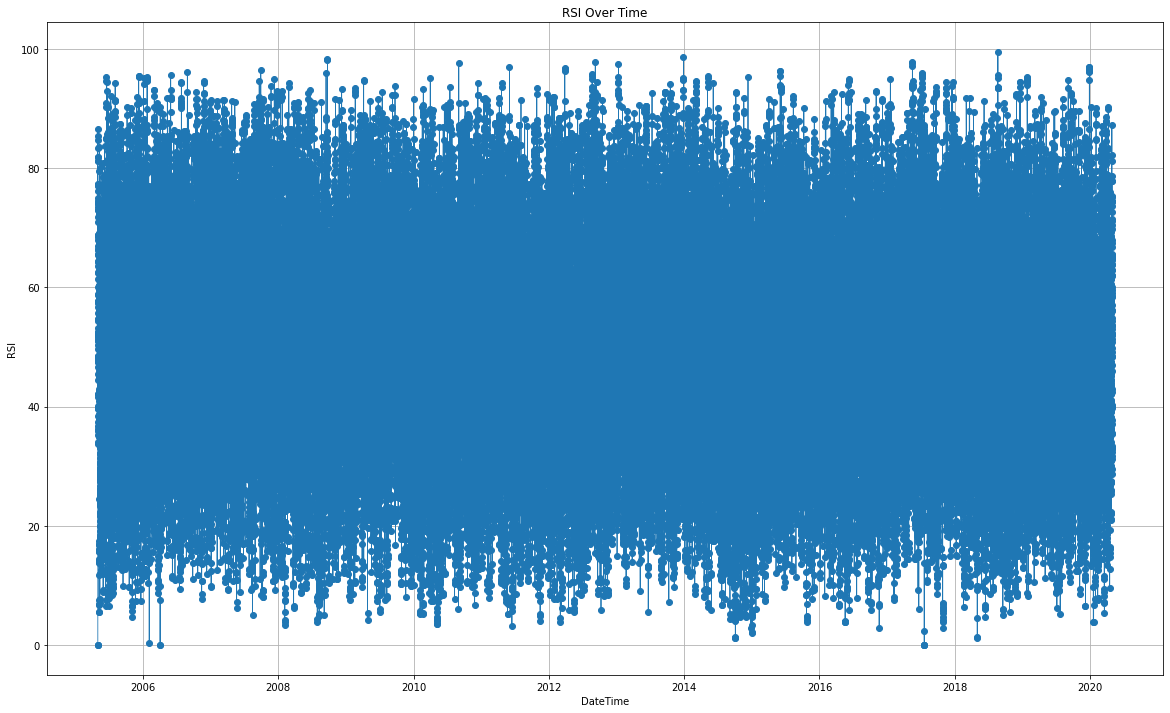

In [44]:
import matplotlib.pyplot as plt

# Convert the DateTime column to datetime type
pandas_df['DateTime'] = pd.to_datetime(pandas_df['DateTime'])
pandas_df.head(3)
# Plotting with adjusted size and line thickness
plt.figure(figsize=(20, 12))
plt.plot(pandas_df['DateTime'], pandas_df['RSI'], marker='o', linewidth=0.8)  # Adjust the linewidth as needed
plt.title('RSI Over Time')
plt.xlabel('DateTime')
plt.ylabel('RSI')
plt.grid(True)
plt.show()


### Buy and Sell Signals

Now Let's add buy and sell signals based on the RSI values

I ll set the thresholds for overbought and oversold conditions to:

- overbought_threshold = 70
- oversold_threshold = 30


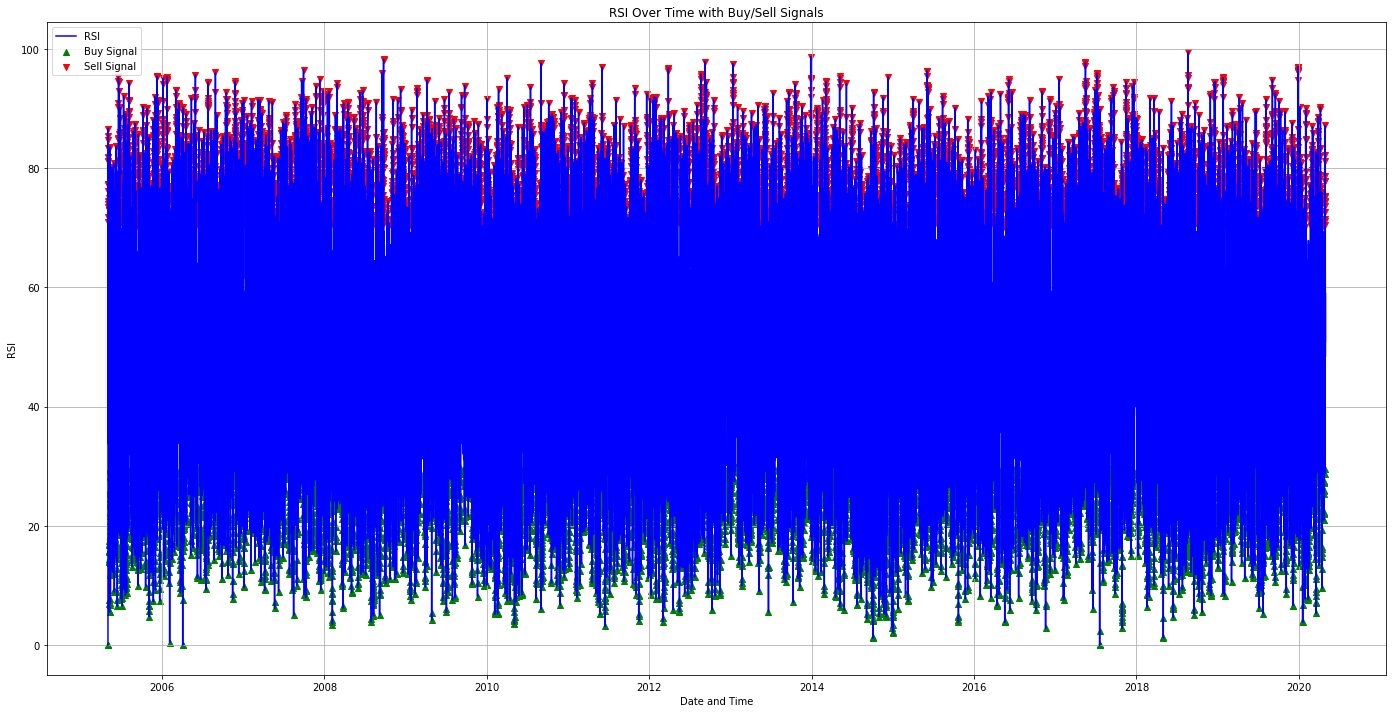

In [45]:
# Set thresholds for overbought and oversold conditions
overbought_threshold = 70
oversold_threshold = 30

# Identify buy signals (RSI < oversold_threshold)
pandas_df["Buy_Signal"] = pandas_df["RSI"] < oversold_threshold

# Identify sell signals (RSI > overbought_threshold)
pandas_df["Sell_Signal"] = pandas_df["RSI"] > overbought_threshold

# Plotting RSI over time with buy/sell signals
plt.figure(figsize=(24, 12))
plt.plot(pandas_df["DateTime"], pandas_df["RSI"], label="RSI", color='blue')
plt.scatter(pandas_df[pandas_df["Buy_Signal"]]["DateTime"], pandas_df[pandas_df["Buy_Signal"]]["RSI"], label="Buy Signal", marker='^', color='green')
plt.scatter(pandas_df[pandas_df["Sell_Signal"]]["DateTime"], pandas_df[pandas_df["Sell_Signal"]]["RSI"], label="Sell Signal", marker='v', color='red')

plt.title("RSI Over Time with Buy/Sell Signals")
plt.xlabel("Date and Time")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()

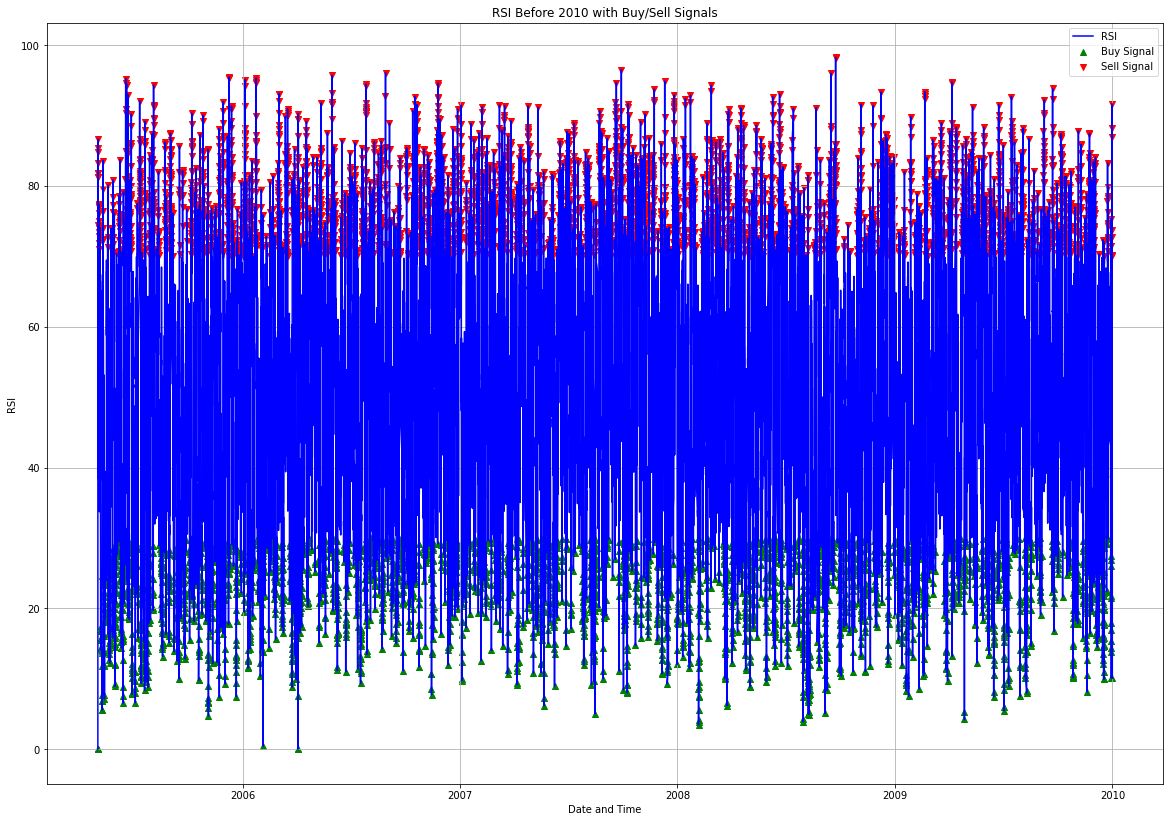

In [46]:
# Filter data for periods before and after 2010
rsi_data_before_2010 = pandas_df[pandas_df["DateTime"] < "2010-01-01"]


# Plotting RSI over time with buy/sell signals before 2010
plt.figure(figsize=(20, 14))
plt.plot(rsi_data_before_2010["DateTime"], rsi_data_before_2010["RSI"], label="RSI", color='blue')
plt.scatter(rsi_data_before_2010[rsi_data_before_2010["Buy_Signal"]]["DateTime"], rsi_data_before_2010[rsi_data_before_2010["Buy_Signal"]]["RSI"], label="Buy Signal", marker='^', color='green')
plt.scatter(rsi_data_before_2010[rsi_data_before_2010["Sell_Signal"]]["DateTime"], rsi_data_before_2010[rsi_data_before_2010["Sell_Signal"]]["RSI"], label="Sell Signal", marker='v', color='red')
plt.title("RSI Before 2010 with Buy/Sell Signals")
plt.xlabel("Date and Time")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()

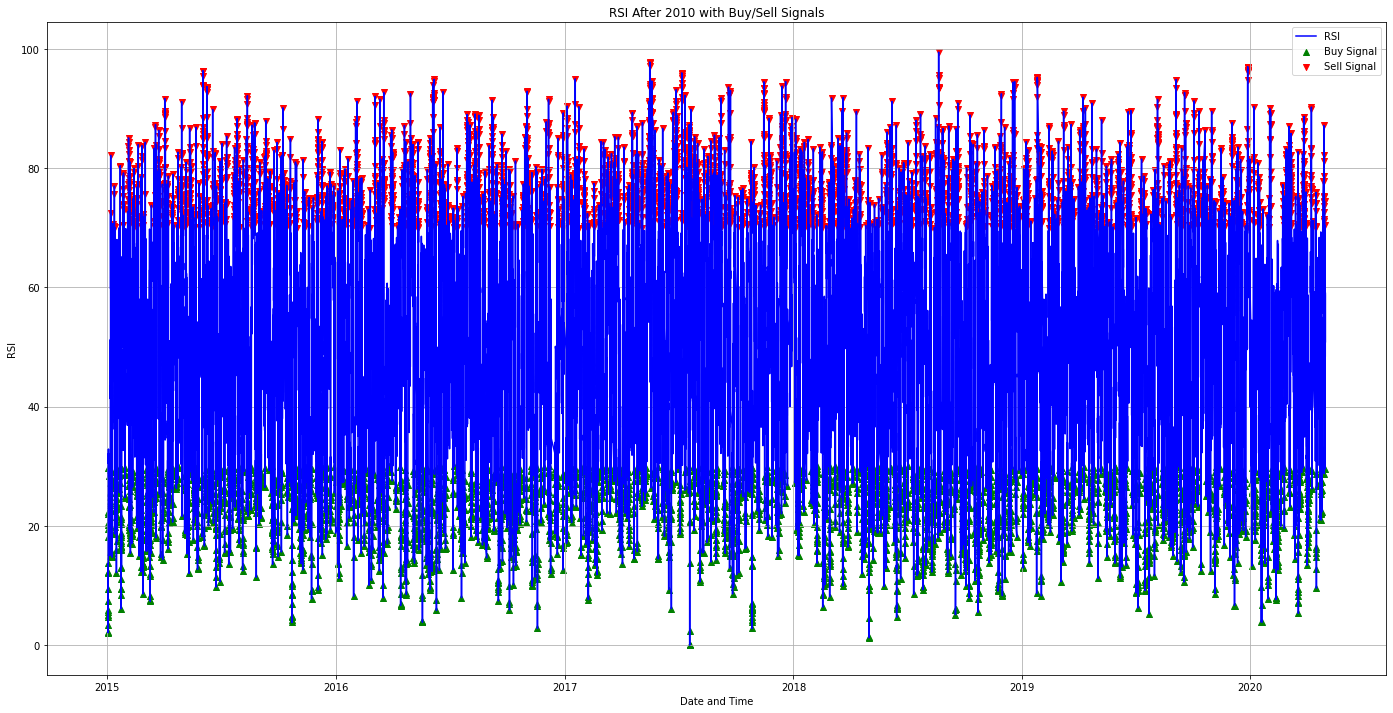

In [47]:
rsi_data_after_2010 = pandas_df[pandas_df["DateTime"] >= "2015-01-01"]

# Plotting RSI over time with buy/sell signals after 2010
plt.figure(figsize=(24, 12))
plt.plot(rsi_data_after_2010["DateTime"], rsi_data_after_2010["RSI"], label="RSI", color='blue')
plt.scatter(rsi_data_after_2010[rsi_data_after_2010["Buy_Signal"]]["DateTime"], rsi_data_after_2010[rsi_data_after_2010["Buy_Signal"]]["RSI"], label="Buy Signal", marker='^', color='green')
plt.scatter(rsi_data_after_2010[rsi_data_after_2010["Sell_Signal"]]["DateTime"], rsi_data_after_2010[rsi_data_after_2010["Sell_Signal"]]["RSI"], label="Sell Signal", marker='v', color='red')
plt.title("RSI After 2010 with Buy/Sell Signals")
plt.xlabel("Date and Time")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()

### Lets calculate some moving averages

A Moving average is a widely used signal in stock trading, which is loading average price over a defined number of days. 

Random fluctuations are very common in stock price. 

Taking an average price in a period can smooth out noise. 

It is sought to be good to find the trend. 

In this project I will be calculating the moving average of the 

In [48]:
df3.show(5)

+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---+-----------------+
|           DateTime|      Date| Time|    BO|    BH|    BL|    BC|                 BCh|    AO|    AH|    AL|    AC|                 ACh|      BC_PriceChange|                Gain|                Loss|             AvgGain|             AvgLoss| RS|              RSI|
+-------------------+----------+-----+------+------+------+------+--------------------+------+------+------+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---+-----------------+
|2005-05-02 00:00:00|2005-05-02|00:00|1.2852|1.2852| 1.284|1.2844|-7.99999999999911...|1.2854|1.2854|1.2842|1.2846|-8.00000000000133...|                NULL|                 0.0|                 0.0|         

In [58]:
# # Define a window specification to group data by day
# window_spec = Window.partitionBy("Date").orderBy("DateTime").rowsBetween(Window.unboundedPreceding, Window.currentRow)


# Define a window specification to order data by DateTime
window_spec = Window.orderBy("DateTime")

# Define the window size for the moving average, e.g., 3 rows
window_size = 25

# Calculate the moving average of the 'BCh' column
df = df.withColumn("MovingAverage_BCh", F.avg("BCh").over(window_spec.rowsBetween(-window_size, 0)))

df.show()


+-------------------+----------+-----+-------+-------+-------+-------+--------------------+-------+-------+-------+-------+--------------------+--------------------+
|           DateTime|      Date| Time|     BO|     BH|     BL|     BC|                 BCh|     AO|     AH|     AL|     AC|                 ACh|   MovingAverage_BCh|
+-------------------+----------+-----+-------+-------+-------+-------+--------------------+-------+-------+-------+-------+--------------------+--------------------+
|2005-05-02 00:00:00|2005-05-02|00:00| 1.2852| 1.2852|  1.284| 1.2844|-7.99999999999911...| 1.2854| 1.2854| 1.2842| 1.2846|-8.00000000000133...|-7.99999999999911...|
|2005-05-02 01:00:00|2005-05-02|01:00| 1.2844| 1.2848| 1.2839| 1.2842|-1.99999999999978E-4| 1.2846|  1.285| 1.2841| 1.2844|-1.99999999999978E-4|-4.99999999999944...|
|2005-05-02 02:00:00|2005-05-02|02:00| 1.2843| 1.2854| 1.2841| 1.2851|7.999999999999119E-4| 1.2845| 1.2856| 1.2843| 1.2853|8.000000000001339E-4|-6.66666666666593...|
|200

In [60]:
# Collect the data to the driver as a list of Row objects
data = df.select("DateTime", "BCh", "MovingAverage_BCh").collect()

# Convert the list of Row objects to a list of dictionaries
data_dict_list = [row.asDict() for row in data]

# Convert the list of dictionaries to a Pandas DataFrame
pandas_df = pd.DataFrame(data_dict_list)

# Convert the DateTime column to datetime type
pandas_df["DateTime"] = pd.to_datetime(pandas_df["DateTime"])

pandas_df.head(5)

,DateTime,BCh,MovingAverage_BCh
0,2005-05-02 00:00:00,-0.0008,-0.000800
1,2005-05-02 01:00:00,-0.0002,-0.000500
2,2005-05-02 02:00:00,0.0008,-0.000067
3,2005-05-02 03:00:00,0.0000,-0.000050
4,2005-05-02 04:00:00,0.0003,0.000020


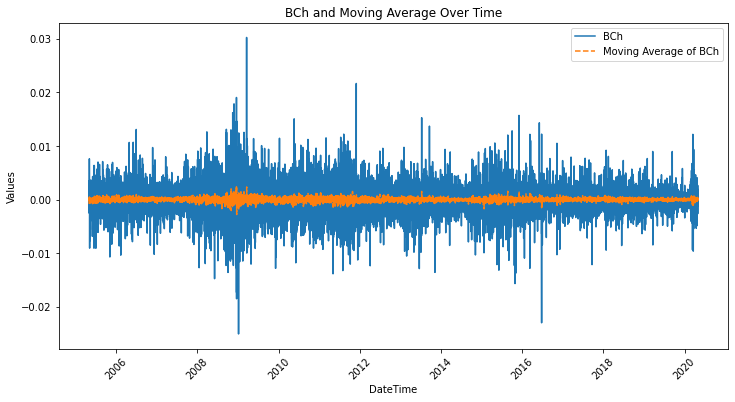

In [61]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot 'BCh' column
plt.plot(pandas_df["DateTime"], pandas_df["BCh"], label="BCh")

# Plot 'MovingAverage_BCh' column
plt.plot(pandas_df["DateTime"], pandas_df["MovingAverage_BCh"], label="Moving Average of BCh", linestyle="--")

# Format the plot
plt.title("BCh and Moving Average Over Time")
plt.xlabel("DateTime")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.show()